Derive the effective results to drive two-photon Raman transitions.

Details in Yiheng Lin's Thesis

https://www.nist.gov/document/yiheng-lin-phd-thesis

$\Lambda$结构的三能级系统由两个电偶跃迁构成:
\begin{equation}
    \hat{H}^{\text{int}}_{\Lambda} = \frac{\hbar\Omega_{ie}}{2}|{i}\rangle\langle{e}|e^{i(\Delta_1 t-k_1z-\phi_1)}+\frac{\hbar\Omega_{\text{me}}}{2}|{m}\rangle\langle{e}|e^{i(\Delta_2 t - k_2 z - \phi_2)}+H.c.
\end{equation}

其中两个超精细结构分别为$|{i}\rangle,|{m}\rangle$，$\Delta_1,\Delta_2$为$|{i}\rangle\rightarrow|{e}\rangle,|{m}\rangle\rightarrow|{e}\rangle$的激光失谐，当失谐量远大于$\Omega_{ie},\Omega_{me}$时，通过二阶微扰计算出等效的哈密顿量:
\begin{equation}
\begin{aligned}
&\hat{H}_{\text{eff}} = -\frac{\hbar|\Omega_1|^2}{4\Delta_1}(|{e}\rangle\langle{e}|-|{i}\rangle\langle{i}|) -\frac{\hbar|\Omega_2|^2}{4\Delta_2}(|{e}\rangle\langle{e}|-|{m}\rangle\langle{m}|)\\ 
&+ [\frac{\hbar\Omega_1\Omega_2}{4\bar{\Delta}}(|{i}\rangle\langle{m}|)e^{i(\delta t + (k_2-k_1) z + \phi_2 - \phi_1)}+H.c.]\\
\end{aligned}
\end{equation}

其中$\delta = \Delta_1 - \Delta_2,\bar{\Delta} = \frac{\Delta_1+\Delta_2}{2}$,前两项是由两束激光导致的AC Stark 位移，第二项是代表的$|{i}\rangle\leftrightarrow |{g}\rangle$的跃迁这一项被称为Raman跃迁，而我们可以通过设置$\delta' = \delta  - (-\frac{\hbar|\Omega_1|^2}{4\Delta_1}+\frac{\hbar|\Omega_2|^2}{4\Delta_2})$来补偿AC Stark位移。但是拉曼过程的缺点是$|{i}\rangle$和$|{g}\rangle$能级与$|{e}\rangle$非共振的耦合会发生衰减，会通过自发辐射导致非相干的量子比特操作\cite{ozeri2007errors}，假设激发态的弛豫速率为$\Gamma$，则自发辐射的速率正比于$\gamma_{\text{SE}} \propto \Gamma \frac{\Omega}{\Delta^2}$而拉曼跃迁的过程正比于失谐量$\Delta$，故我们可以通过增加$\Delta$来减少自发辐射的速率$\gamma_{\text{SE}}$,然后增加激光的功率即$\Omega$的大小来保持拉曼跃迁的的速率。

在补偿AC Stark位移之后等效的哈密顿量可以写为:
\begin{equation}
    \hat{H}_{\text{eff}} = \frac{\hbar\Omega_1\Omega_2}{4\bar{\Delta}}[(|{i}\rangle\langle{m}|)e^{i(\delta t + (k_2-k_1) z + \phi_2 - \phi_1)}+H.c.)]
\end{equation}
cite from guangcheng's underagraduate thesis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

%matplotlib inline

In [72]:
e = basis(3,0)
g = basis(3,1)
r = basis(3,2)
def TimeEvolutionState(tlist,rho0,omega_g,omega_r,gamma,detuning_g,detuning_r):
    #Hamiltonian
    Hhalf = (omega_g*g*e.dag()+omega_r*r*e.dag())/2
    H = Hhalf + Hhalf.dag() + detuning_g*g*g.dag()+ detuning_r*r*r.dag()

    #solve the steady state
    c_ops = [np.sqrt(gamma/2)*g*e.dag(),np.sqrt(gamma/2)*r*e.dag()]
    e_ops = [g*g.dag(),r*r.dag(),e*e.dag()]
    opts = Options(store_states=True,nsteps=5000)
    output = mesolve(H, rho0, tlist, c_ops, e_ops, options=opts)
    return output

# #(a) $ \Delta= 100\Gamma, \gamma_{20}= \gamma_{21} = \Gamma/2, \Omega_c = \Gamma,  \Omega_p = \Gamma, \delta=0$


In [73]:
gamma = np.pi*20
omega_g = gamma
omega_r = gamma
delta = 0
Delta = 100*gamma
tlist = np.linspace(0,50,500)
rho0 = g
output=TimeEvolutionState(tlist,rho0, omega_g,omega_r,gamma,Delta,Delta)

<Figure size 576x288 with 0 Axes>

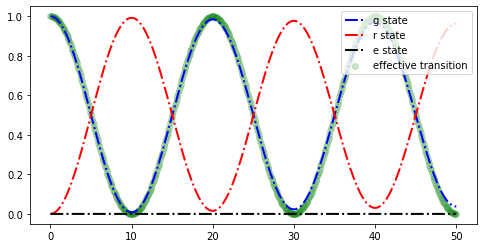

In [74]:
#effective transion
sx = sigmax()
sy = sigmay()
sz = sigmaz()
I = identity(2)
omega_eff = omega_g*omega_r/(2*Delta)
delta_prime = delta+(omega_g**2-omega_r**2)/(4*Delta)
H_eff = (sz-I)*delta_prime+sx*omega_eff/2
psi0 = basis(2,0)
eff_output = mesolve(H_eff, psi0, tlist,c_ops=[],e_ops=[basis(2,0)*basis(2,0).dag()])
plt.figure(figsize=(8,4))
plt.figure(figsize=(8,4))
plt.plot(tlist,output.expect[0],c="blue",label="g state",linestyle="-.",linewidth=2)
plt.plot(tlist,output.expect[1],c="red",label="r state",linestyle="-.",linewidth=2)
plt.plot(tlist,output.expect[2],c="black",label="e state",linestyle="-.",linewidth=2)
plt.scatter(tlist,eff_output.expect[0],c="green",label="effective transition",alpha=0.2)
plt.legend(loc=1)

# #(b) $ \Delta= 100\Gamma, \gamma_{20}= \gamma_{21} = \Gamma/2, \Omega_c = 2\Gamma,  \Omega_p = \Gamma/2, \delta=0$


In [79]:
gamma = np.pi*20
omega_g = 0.5*gamma
omega_r = 2*gamma
delta = 0
Delta = 100*gamma
tlist = np.linspace(0,50,500)
rho0 = g
output=TimeEvolutionState(tlist,rho0, omega_g,omega_r,gamma,Delta,Delta)

-0.5890486225480862


<Figure size 576x288 with 0 Axes>

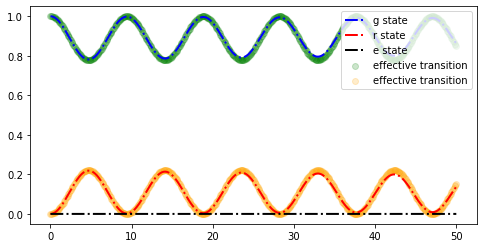

In [80]:
#effective transion
sx = sigmax()
sy = sigmay()
sz = sigmaz()
I = identity(2)
omega_eff = omega_g*omega_r/(2*Delta)
delta_prime = delta+(omega_g**2-omega_r**2)/(4*Delta)

H_eff = (sz-I)*delta_prime/2+sx*omega_eff/2
psi0 = basis(2,0)
eff_output = mesolve(H_eff, psi0, tlist,c_ops=[],e_ops=[basis(2,0)*basis(2,0).dag(),basis(2,1)*basis(2,1).dag()])
plt.figure(figsize=(8,4))
plt.plot(tlist,output.expect[0],c="blue",label="g state",linestyle="-.",linewidth=2)
plt.plot(tlist,output.expect[1],c="red",label="r state",linestyle="-.",linewidth=2)
plt.plot(tlist,output.expect[2],c="black",label="e state",linestyle="-.",linewidth=2)
plt.scatter(tlist,eff_output.expect[0],c="green",label="effective transition",alpha=0.2)
plt.scatter(tlist,eff_output.expect[1],c="orange",label="effective transition",alpha=0.2)
plt.legend(loc=1)

# #(c) $ \Delta= 100\Gamma, \gamma_{20}= \gamma_{21} = \Gamma/2, \Omega_c = \Gamma/2,  \Omega_p = 2\Gamma, \delta=0$


In [81]:
gamma = np.pi*20
omega_g = 2*gamma
omega_r = 0.5*gamma
delta = 0
Delta = 100*gamma
tlist = np.linspace(0,50,500)
rho0 = g
output=TimeEvolutionState(tlist,rho0, omega_g,omega_r,gamma,Delta,Delta)

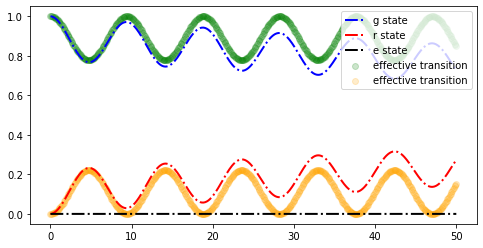

In [82]:
#effective transion
sx = sigmax()
sy = sigmay()
sz = sigmaz()
I = identity(2)
omega_eff = omega_g*omega_r/(2*Delta)
delta_prime = delta+(omega_g**2-omega_r**2)/(4*Delta)

H_eff = (sz-I)*delta_prime/2+sx*omega_eff/2
psi0 = basis(2,0)
eff_output = mesolve(H_eff, psi0, tlist,c_ops=[],e_ops=[basis(2,0)*basis(2,0).dag(),basis(2,1)*basis(2,1).dag()])
plt.figure(figsize=(8,4))
plt.plot(tlist,output.expect[0],c="blue",label="g state",linestyle="-.",linewidth=2)
plt.plot(tlist,output.expect[1],c="red",label="r state",linestyle="-.",linewidth=2)
plt.plot(tlist,output.expect[2],c="black",label="e state",linestyle="-.",linewidth=2)
plt.scatter(tlist,eff_output.expect[0],c="green",label="effective transition",alpha=0.2)
plt.scatter(tlist,eff_output.expect[1],c="orange",label="effective transition",alpha=0.2)
plt.legend(loc=1)